In [1]:
import pandas as pd
import numpy as np
from anndata import AnnData
import scanpy as sc
import scipy.sparse as sp

In [2]:
def load_macaque_data(file_path):
    df = pd.read_csv(file_path, sep='\t',header=0)
    data_matrix = df.pivot_table(index='cell_id', columns='gene', values='expr', aggfunc='sum', fill_value=0)
    obs_data = df[['chip', 'cell_id', 'gene_area']].drop_duplicates('cell_id').set_index('cell_id')
    spatial_data = df[['cell_id', 'x', 'y', 'rx', 'ry']].drop_duplicates('cell_id').set_index('cell_id')
    obsm_data = {'spatial': spatial_data[['x', 'y', 'rx', 'ry']].values}

    adata = sc.AnnData(
        X=sp.csr_matrix(data_matrix),  # 细胞-基因表达矩阵
        obs=obs_data,  # 观测值矩阵
        var=pd.DataFrame(index=data_matrix.columns),  # 变量矩阵
        obsm=obsm_data,  # 观测值的多维数组
        uns={'metadata': 'optional metadata can be stored here'}  # 其他未结构化数据
    )
    
    return adata


In [3]:
file_path = '/home/hanyuji/Data/ST_data/macaque_cortex/ST_result/20230503-macaque1-sct/total_gene_T25.type20230503-macaque1-contour2.round.txt'
adata = load_macaque_data(file_path)
adata.X.dtype

/tmp/ipykernel_952727/674388504.py:3: PerformanceWarning: The following operation may generate 6037520715 cells in the resulting pandas object.
  data_matrix = df.pivot_table(index='cell_id', columns='gene', values='expr', aggfunc='sum', fill_value=0)
/home/hanyuji/miniconda3/envs/PASTE/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


dtype('float64')

In [4]:
file_path = '/home/hanyuji/Data/ST_data/macaque_cortex/ST_result/20230503-macaque1-sct/total_gene_T27.type20230503-macaque1-contour2.round.txt'
adata2 = load_macaque_data(file_path)
adata2.X.shape

/tmp/ipykernel_952727/674388504.py:3: PerformanceWarning: The following operation may generate 4274468222 cells in the resulting pandas object.
  data_matrix = df.pivot_table(index='cell_id', columns='gene', values='expr', aggfunc='sum', fill_value=0)
/home/hanyuji/miniconda3/envs/PASTE/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


(276593, 15454)

In [5]:
file_path = '/home/hanyuji/Data/ST_data/macaque_cortex/ST_result/20230503-macaque1-sct/total_gene_T28.type20230503-macaque1-contour2.round.txt'
adata3 = load_macaque_data(file_path)
adata3.X.shape

/tmp/ipykernel_952727/674388504.py:3: PerformanceWarning: The following operation may generate 3021677520 cells in the resulting pandas object.
  data_matrix = df.pivot_table(index='cell_id', columns='gene', values='expr', aggfunc='sum', fill_value=0)
/home/hanyuji/miniconda3/envs/PASTE/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


(198690, 15208)

In [6]:
file_path = '/home/hanyuji/Data/ST_data/macaque_cortex/ST_result/20230503-macaque1-sct/total_gene_T29.type20230503-macaque1-contour2.round.txt'
adata4 = load_macaque_data(file_path)
adata4.X.shape

/tmp/ipykernel_952727/674388504.py:3: PerformanceWarning: The following operation may generate 4908409562 cells in the resulting pandas object.
  data_matrix = df.pivot_table(index='cell_id', columns='gene', values='expr', aggfunc='sum', fill_value=0)
/home/hanyuji/miniconda3/envs/PASTE/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


(317861, 15442)

In [7]:
file_path = '/home/hanyuji/Data/ST_data/macaque_cortex/ST_result/20230503-macaque1-sct/total_gene_T30.type20230503-macaque1-contour2.round.txt'
adata5 = load_macaque_data(file_path)
adata5.X.shape

/tmp/ipykernel_952727/674388504.py:3: PerformanceWarning: The following operation may generate 6265554785 cells in the resulting pandas object.
  data_matrix = df.pivot_table(index='cell_id', columns='gene', values='expr', aggfunc='sum', fill_value=0)
/home/hanyuji/miniconda3/envs/PASTE/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


(398699, 15715)

In [8]:
adata_merged = sc.concat(
    [adata, adata2, adata3, adata4, adata5],
    join='outer',  # 使用'outer'合并变量（基因），缺失的数据会用0填充
    keys=['1', '2', '3', '4', '5'],
    index_unique='-'
)

In [27]:
# 在obs中添加'slice'列来标记切片编号
adata_merged.obs['slice'] = adata_merged.obs_names.str.split('-').str.get(1)
adata_merged.obs['slice'] = adata_merged.obs['slice'].astype(int)

In [28]:
z_values = adata_merged.obs['slice'].values.reshape(-1, 1)

# 更新adata_merged.obsm['spatial']以包括新的列
adata_merged.obsm['spatial'] = np.hstack((adata_merged.obsm['spatial'], z_values))

In [29]:
coo = pd.DataFrame(adata_merged.obsm['spatial'])
coo

,0,1,2,3,4,5
0,30219.0,41486.0,26495.0,78768.0,1,1
1,45507.0,82615.0,24584.0,34927.0,1,1
2,42446.0,48058.0,16863.0,68738.0,1,1
3,47325.0,43145.0,10723.0,71934.0,1,1
4,27509.0,106368.0,49007.0,17861.0,1,1
...,...,...,...,...,...,...
1578933,31921.0,51199.0,35839.0,32572.0,5,5
1578934,36062.0,45055.0,31056.0,26912.0,5,5
1578935,4881.0,44626.0,61996.0,23120.0,5,5
1578936,35088.0,63003.0,33961.0,44650.0,5,5


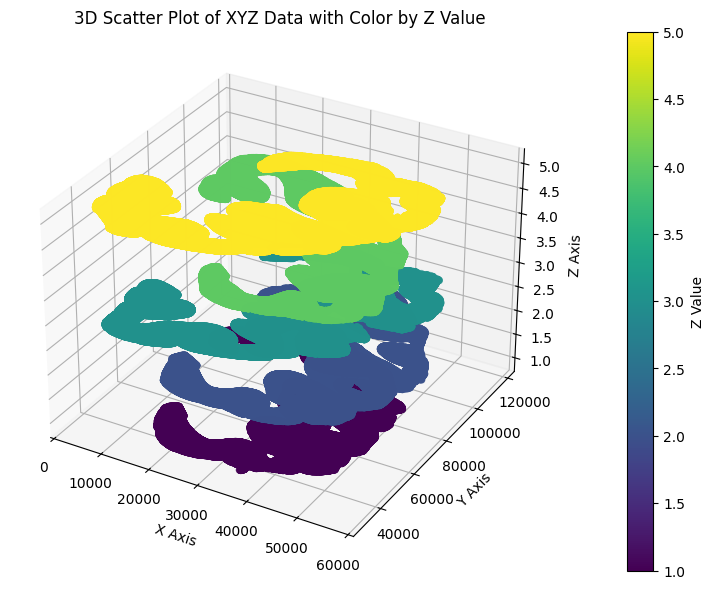

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data with color varying by z value
scatter = ax.scatter(coo[0], coo[1], coo[5], c=coo[5], cmap='viridis', marker='o')

# Adding color bar
color_bar = fig.colorbar(scatter, ax=ax, pad=0.1)
color_bar.set_label('Z Value')

# Adding labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Adding a title
ax.set_title('3D Scatter Plot of XYZ Data with Color by Z Value')

# Display the plot
plt.show()


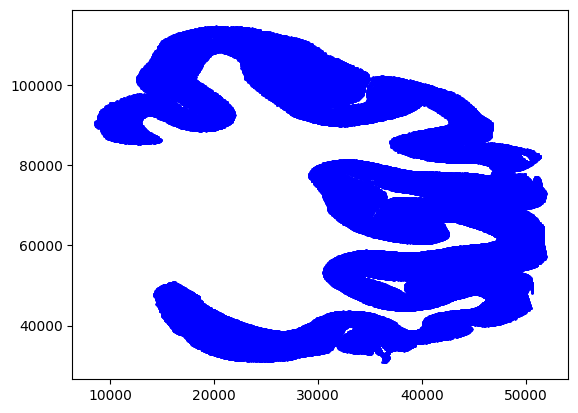

In [44]:
import matplotlib.pyplot as plt
coo = pd.DataFrame(adata.obsm['spatial'])

fig = plt.figure(figsize=(10, 10))
plt.scatter(coo[0], coo[1], c='b', marker='x',s=1)

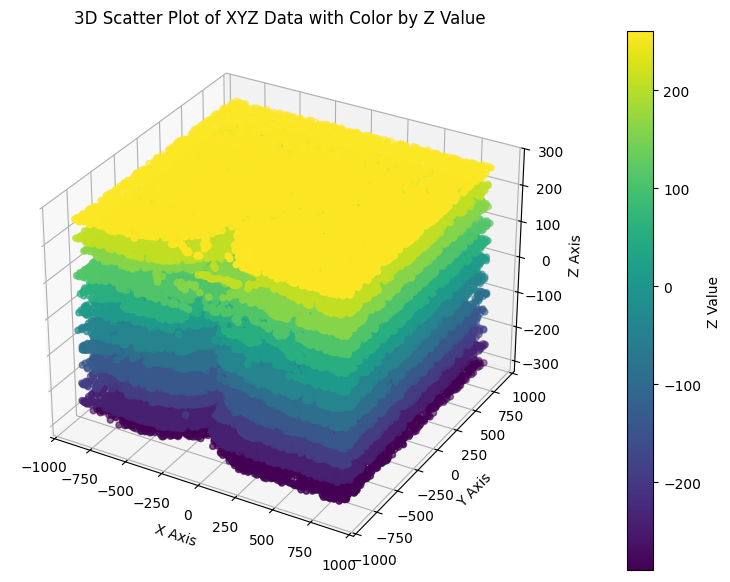

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data with color varying by z value
scatter = ax.scatter(df['x'], df['y'], df['z'], c=df['z'], cmap='viridis', marker='o')

# Adding color bar
color_bar = fig.colorbar(scatter, ax=ax, pad=0.1)
color_bar.set_label('Z Value')

# Adding labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Adding a title
ax.set_title('3D Scatter Plot of XYZ Data with Color by Z Value')

# Display the plot
plt.show()


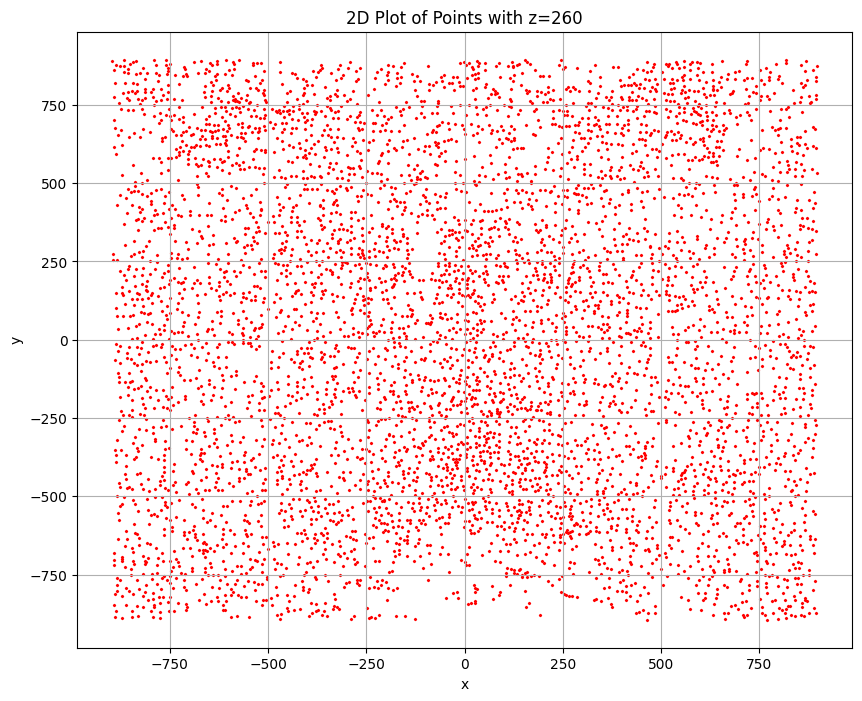

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 选择z坐标为260的点
z_index = 3
z_values = [260, 210, 160, 110, 60, 10, -40, -90, -140, -190, -240, -290]
df_filtered = df[df['z'] == z_values[z_index]]

# 绘制2D平面图
plt.figure(figsize=(10, 8))
plt.scatter(df_filtered['x'], df_filtered['y'], c='r',s=2, marker='x')
plt.title(f'2D Plot of Points with z={z_value}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
